# 例題
オイラー法を実装し、時刻t=0で定電圧Vに接続されるRC直列回路をシミュレーションする。  
支配方程式は、$x(t)$をコンデンサの両端にかかる電圧として、以下のように表せる。  
$$
CR\frac{dx(t)}{dt}=V-x(t),   x(0)=0
$$

## 実装の方針
時間を$CR=1\mu s$、電圧を$V=1V$を単位に測ると、解くべき方程式は以下のようになる。  
$$
\frac{dx(t)}{dt}=1-x(t),  x(0)=0
$$
上記方程式の解析解は、$x(t)=1-e^{-t}$で与えられる。  
以下、Pythonでの実装例を示す。  

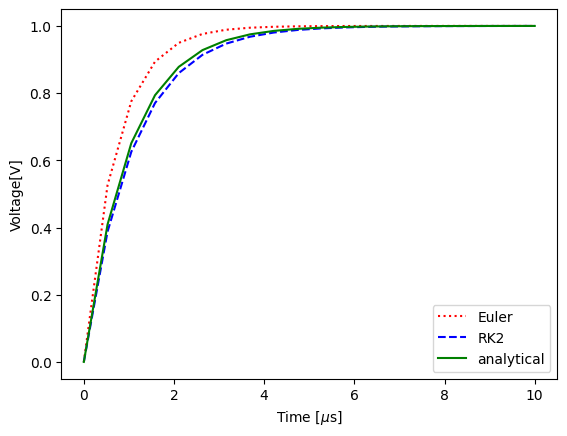

In [6]:
import numpy as np
import matplotlib.pyplot as plt

rhs = lambda t, x : 1 - x     # 関数（右辺）rhs(t,x)=1-xを定義

# オイラー法
def Euler(rhs, t, x0, args=()):
    # tは計算する時刻の配列、x0は初期値x(t=0)
    # 関数の列数指定ができるようにargs=()としておく
    ans = [x0]
    for i in range(len(t)-1):
        x1 = x0 + (t[i+1] - t[i])*rhs(t[i], x0, *args)
        ans.append(x1)
        x0 = x1
    return np.array(ans)

# 2次のルンゲ・クッタ法
def RK2(rhs, t, x0, args=()):
    ans = [x0]
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        p1 = x0 + 0.5 * h * rhs(t[i], x0, *args)
        x1 = x0 + h * rhs(t[i]+0.5*h, p1, *args)
        ans.append(x1)
        x0 = x1
    return np.array(ans)

t = np.linspace(0, 10, 20)
I = 1 - np.exp(-t)   # 解析解
y_Euler = Euler(rhs, t, 0)
y_RK2 = RK2(rhs, t, 0)

# matplotlibによる可視化
plt.plot(t, y_Euler, c="red", ls=":", label="Euler")
plt.plot(t, y_RK2, c="blue", ls="--", label="RK2")
plt.plot(t, I, c="green", ls="-", label="analytical")
plt.xlabel("Time [$\mu$s]")
plt.ylabel("Voltage[V]")
plt.grid()
plt.legend()
plt.show()